Dictionary Inputs 

In [1]:
#from __future__ import annotations
#from tkinter import N

from CARTplus import *

import pandas as pd

#d = dict(features, **n_features)  #merges the two dicts
#df = pd.DataFrame(data=d)         #creates the dataframe

#print(df)
#import csv



#####################################loading the carseats data#########################

df=pd.read_csv('Carseats_train.csv')
#df=df.iloc[:,1:]

features_names=list(df.columns)

colonne=features_names[:6]
features_name=features_names[7:9]
features_names=colonne + features_name




n_features_names=list(df.columns)
columns = [(n_features_names[6])]
n_features_name = n_features_names[9:11]
n_features_names=columns + n_features_name




features=df.iloc[:,0:6]
features2=df.iloc[:,7:9]

features=dict(features)
features2=dict(features2)


n_features=df.iloc[:,6:7]
n_features2=df.iloc[:,9:11]


n_features=dict(n_features)
n_features2=dict(n_features2)

features = dict(features, **features2)
n_features = dict(n_features, **n_features2)


#############################################################################


#import itertools
#from statistics import mode
'''
print(features,'features',type(features))
print()
print(features_names,'features_names')
print()
print(n_features,'n_features')
print()
print(n_features_names,'n_features_names')
print()
'''
########################### y categorical #######################################
'''
High=[]
for i in features['Sales']:
    if i < 8:
        High.append('NO')
    else:
        High.append('YES')

High=pd.DataFrame(High)
High=dict(High)
High['High'] = High.pop(0)

#y=High['High']

#exclude_keys = ['Sales']

#new_d = {k: features[k] for k in set(list(features.keys())) - set(exclude_keys)}
#features=new_d

#features_names=features_names[1:]
'''

######################y numerical#####################################
y=features['Price']
exclude_keys = ['Price']
new_d = {k: features[k] for k in set(list(features.keys())) - set(exclude_keys)}
features=new_d

indici = np.arange(0, len(y))

features_names3 = features_names[0:5]
features_names4 = features_names[6:]
features_names = features_names3 +  features_names4 

#############Data Prep for prediction ############
df_test=pd.read_csv('Carseats_test.csv')
#df_test=df_test.iloc[:,1:]


features_test=df_test.iloc[:,0:6]
features2_test=df_test.iloc[:,7:9]

features_test=dict(features_test)
features2_test=dict(features2_test)


n_features_test=df_test.iloc[:,6:7]
n_features2_test=df_test.iloc[:,9:11]


n_features_test=dict(n_features_test)
n_features2_test=dict(n_features2_test)

features_test = dict(features_test, **features2_test)
n_features_test = dict(n_features_test, **n_features2_test)

y_test=features_test['Price']

y_test = y_test.tolist()

del features_test["Price"]   

#impurity = impurity_fn('MSE') # chhose the simplest impurity functin (for regression tree)

#impurity = Impurity ("MSE")
# start a tree structure by instantiating its root
#print("features", features)
#print("features_names", features_names)
#print("n_features", n_features)
#print("n_features_names", n_features_names)



############Program Running


###User Defined Function 



#when definining a funcion please be aware we are using purity gain or information gain or greatest difference between variance, all positive aspects 
#adding user_defined as a possible impurity_fn and added user_impur to carry that function 
def user_fn(self, node): #impur just takes node in CART
    
    return (mean(self.y[node.indexes])**2)*len(self.y[node.indexes])






In [2]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "pearson", problem="regression", method = "TWO-STAGE",  min_cases_parent= 10,min_cases_child= 5, max_level =4 , twoing = False, min_imp_gain = 0.0001)

cart.growing_tree(my_tree, max_k = 1)



Split Found:  n1 [['Sales', 7.55, 0.17589235831460692, 0]] start
node_proportion_total  0.17589235831460737
Split Found:  n2 [['Sales', 1.165, 0.09046547352009915, 1]] left
node_proportion_total  0.21218596573286658
Node_proportion_gain  0.03629360741825921
Node Search Split Error for:  n4 with obs in node:  5  which is less than minimum parent size:  10
TypeError: Node search split (cart) failure
Split Found:  n5 [['Sales', 2.96, 0.021926958017563947, 2]] right
node_proportion_total  0.21964266133433702
Node_proportion_gain  0.007456695601470442
Node Search Split Error for:  n10 with obs in node:  9  which is less than minimum parent size:  10
TypeError: Node search split (cart) failure
Split Found:  n11 [['Population', 94.5, 0.014772463034646854, 3]] right
node_proportion_total  0.22434170323703895
Node_proportion_gain  0.004699041902701928
Split Found:  n22 [['Sales', 5.01, 0.15220530665506748, 4]] left
node_proportion_total  0.230769992559935
Node_proportion_gain  0.006428289322896

((None, (None, ((None, None), (None, None)))),
 (((None, None), ((None, None), None)), (None, ((None, None), None))))

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 


cart.print_tree(table = False, html = False)#.style.hide_index() #print both the pruned and non pruned tree 
#cart.print_tree(table = False, html = False, visual_pruning = True)

In [4]:
cart.df.loc[1:10, features_names]

,Sales,CompPrice,Income,Advertising,Population,Age,Education
1,11.22,111,48,16,260,65,10
2,10.06,113,35,10,269,59,12
3,7.40,117,100,4,466,55,14
4,4.15,141,64,3,340,38,13
5,10.81,124,113,13,501,78,16
6,6.63,115,105,0,45,71,15
7,11.85,136,81,15,425,67,10
8,6.54,132,110,0,108,76,10
9,4.69,132,113,0,131,76,17
10,9.01,121,78,9,150,26,10


In [5]:
kf = k_folds(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level =4 , twoing = False, min_imp_gain = 0.0001)



Folds:  1
Split Found:  n1 [['CompPrice', 127.5, 3443383.899844921, 0]] start
node_proportion_total  0.20314186702064307
Split Found:  n2 [['Sales', 7.55, 1693667.9671065214, 1]] left
node_proportion_total  0.3010167133729555
Node_proportion_gain  0.09787484635231242
Split Found:  n4 [['Age', 53.5, 1117055.3981106612, 2]] left
node_proportion_total  0.3316952130875218
Node_proportion_gain  0.03067849971456632
Split Found:  n8 [['Income', 67.0, 418639.07692307694, 3]] left
node_proportion_total  0.3479996948239073
Node_proportion_gain  0.01630448173638549
Split Found:  n16 [['Age', 40.5, 179045.45238095237, 4]] left
node_proportion_total  0.35398462236823613
Node_proportion_gain  0.005984927544328833
This split isn't good now i cut it [reg delta]
Split Found:  n17 [['CompPrice', 120.5, 241165.92500000002, 4]] right
node_proportion_total  0.3590137100692649
Node_proportion_gain  0.005029087701028778
This split isn't good now i cut it [reg delta]
Split Found:  n9 [['Sales', 2.755, 70286

{leaves : mean square error} =  {15: 550.1399335789872, 14: 548.2992963748453, 13: 545.8969665351963, 10: 539.632917125959, 9: 533.8303612936171, 8: 541.1827582124594, 7: 541.8057150332885, 6: 518.364122246991, 3: 517.7256656169034, 2: 519.084830563528}
Best tree for test set has 3 leaves with a deviance of: 517.7256656169034 


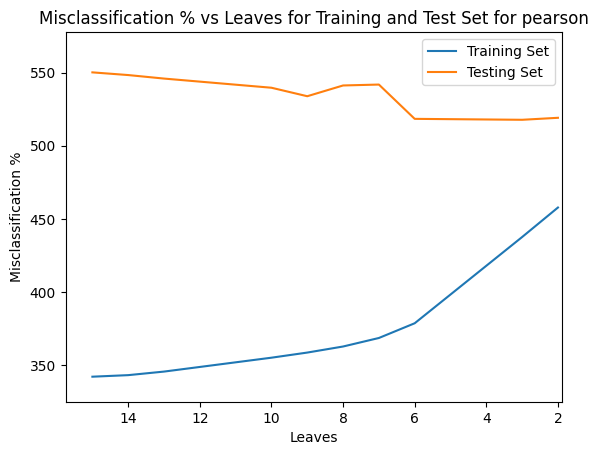

,Node,Node Type,Variable Split,n,Impurity Value,Deviance,Explained Deviance,Class/Value
0,n1,Parent,Sales>7.55,280,155526.82,155526.82,0.176,115.78
1,n3,Child,None,133,65775.44,65775.44,None,105.38
2,n2,Parent,Sales>1.165,147,62395.4,62395.40,0.212,125.18
3,n4,Child,None,5,3860.8,3860.80,None,158.2
4,n5,Child,None,142,52889.97,52889.97,None,124.01


In [6]:
alpha, pruned_table = cart.pruning(features_test, n_features_test, y_test, table = True)
pruned_table#.style


In [7]:
cart.print_alpha(alpha)


('Alpha = 0', 'value soglia = None', 'deviance = 342.12582057823124', 'leaves = 15')
('Alpha = 297.0173076923079', "value soglia = ['Population', 254.0, 3]", 'deviance = 343.18659667713234', 'leaves = 14')
('Alpha = 681.7573770491836', "value soglia = ['Population', 129.5, 4]", 'deviance = 345.621444452308', 'leaves = 13')
('Alpha = 885.8947368421068', "value soglia = ['Population', 94.5, 3]", 'deviance = 355.11317377561625', 'leaves = 10')
('Alpha = 981.2304878048781', "value soglia = ['Income', 115.0, 4]", 'deviance = 358.61756837491936', 'leaves = 9')
('Alpha = 1159.7161918881684', "value soglia = ['Sales', 2.96, 2]", 'deviance = 362.7594119173773', 'leaves = 8')
('Alpha = 1629.8704836473407', "value soglia = ['Sales', 9.47, 3]", 'deviance = 368.58037793040336', 'leaves = 7')
('Alpha = 2820.0964982778387', "value soglia = ['Sales', 7.79, 2]", 'deviance = 378.65215113853856', 'leaves = 6')
('Alpha = 5501.204373739238', "value soglia = ['Sales', 9.825, 1]", 'deviance = 437.59362657145

In [8]:
#all_node = cart.get_all_node()
#leaf = cart.get_leaf()
#      
#leaf_list =[]
#leaf_dict ={}
#for node in leaf:                           #creates a list of the node numbers and a dictionary connecting nodes with their node numbers
#    leaf_list.append(int(node.name[1:]))
#    leaf_dict[node] = int(node.name[1:])
#father_list =[]
#father_dict = {}
#for node in all_node:
#    father_list.append(int(node.name[1:]))
#    father_dict[node] = int(node.name[1:])
#
#parent_child =[]                            #list for having child with their parent, for use in dictionary below
#for node in all_node:
#    if (int(node.name[1:]) *2) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2])
#    if (int(node.name[1:])*2+1) in father_list:
#    
#        parent_child.append([int(node.name[1:]), int(node.name[1:])*2+1])  
#parent_children = {}                        #dictionary for parents with children, only numbers
#for parent, child in parent_child: 
#    if parent in parent_children:
#        parent_children[parent].append(child)
#    else:
#        parent_children[parent] = [child]
#
##igraph Graph
#        
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#

In [9]:
#node_prop_dict = {}
#for i in range(len(father_list)):
#    if get_key(father_dict, father_list[i]).node_prop:
#        node_prop_dict[father_list[i]] = get_key(father_dict, father_list[i]).node_prop

In [10]:
#node_prop_gain = {}
#node_prop_gain[1] = node_prop_dict[1]
#for i in range(len(node_prop_dict)):
#    if i!= 0:
#        node_prop_gain[list(node_prop_dict.keys())[i]] = node_prop_dict[list(node_prop_dict.keys())[i]] - node_prop_dict[list(node_prop_dict.keys())[i-1]]

In [11]:
#nr_vertices = max(father_list)                            # make too many to allow for missing nodes
#v_label = list(map(str, father_list) )                      # create node labels 
#G = Graph.Tree(nr_vertices, 2)                              # 2 stands for children number
#lay = G.layout_reingold_tilford(root=[0])
#position = {k: lay[k-1] for k in father_list}               # assigning nodes to positions , using reigngold layou
#
#new_dict = cart.identify_subtrees(cart.get_all_node(), cart.get_leaf())
#    
#for i in sorted(position.keys()):
#    if i*2 in position: #left nodes
#        diff = position[i*2][1] - position[i*2][1]*node_prop_gain[i] #calculates change in position for correction in downward nodes
#        position[i*2] = [position[i*2][0], position[i*2][1]*node_prop_gain[i]] #manipulates the y coordinate based on the proportion gain
#        
#        #this is to correct for all downward nodes 
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#
#    if i*2+1 in position:  #right nodes
#        position[i*2+1] = [position[i*2+1][0], position[i*2+1][1]*node_prop_gain[i]]
#        
#        #this is to correct for all downward nodes
#        unique_nodes = []
#        for fathers in new_dict:
#            if i*2+1 == int(fathers.name[1:]):
#                for nestedlist in new_dict[fathers]:
#                    for childs in nestedlist:
#                        if childs.name not in unique_nodes:
#                            unique_nodes.append(childs.name)
#                            position[int(childs.name[1:])] = [position[int(childs.name[1:])][0], position[int(childs.name[1:])][1] - diff]
#
#position[1] = [0 , 2*position[2][1]]
#

In [12]:
#Y = [lay[k][1] for k in range(len(father_list))] # levels of the tree
#M = max(Y)
#es = EdgeSeq(G)                                             # sequence of edges
#E = [e.tuple for e in G.es] # list of edges, connects nodes
##L = len(position)
#Xn = [position[k][0] for k in father_list]
#Yn = [position[k][1] for k in father_list]
#a = 0
#while a<20:                                                 # When the value is removed it skips to the next index value, jumping, a<10 is just overkill, increased to 20, for really narrow branches
#    for edge in E:   #this is meant to catch the mismateched E's 
#        if edge[0] +1 not in position or edge[1]+1 not in position:
#            E.remove(edge) 
#    a+=1
#Xe = []
#Ye = []
#
#for edge in E: 
#    Xe+=[position[edge[0]+1][0],position[edge[1]+1][0], None]                   # edited for +1 poisiotn as the expected 0 root node it 1 in our dictionary, if index error, increase a 
#    Ye+=[position[edge[0]+1][1],position[edge[1]+1][1], None]         
#

In [13]:
#upward facing tree
#pos = Ye[1]*2
#Ye[0] = pos
#Ye[3] = pos
#Yn[24]  =pos

In [14]:
#for label in range(len(v_label)):
#    for node in all_node:
#        if v_label[label] == node.name[1:]:
#            if int(v_label[label]) in leaf_list:
#                if cart.problem == "classifier":        #For classifier problem
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples : {len(node.indexes)}" 
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : None, Samples : {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, Class: {class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#            
#            #label for non leaves
#            else:
#                if cart.problem == "classifier":
#                    response_dict ={}
#                    for response in cart.y[node.indexes]:        #determing majority in terminal nodes
#                        if response in response_dict:
#                            response_dict[response] +=1
#                        else:
#                            response_dict[response] =1
#                    
#                    if cart.method == "LATENT-BUDGET-TREE" or cart.twoing: #multiclass methods
#                        total_node_obs = sum(response_dict.values())
#                        for key in response_dict:
#                            response_dict[key] = round(response_dict[key] / total_node_obs,2)
#                        class_node = response_dict
#                        myKeys = list(class_node.keys())
#                        myKeys.sort()
#                        class_node = {i: class_node[i] for i in myKeys}
#                    else:
#                        class_node = max(response_dict, key = response_dict.get)
#                    if cart.impurity_fn == "gini":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node, display = True),2)}, Samples: {len(node.indexes)}"
#                    elif cart.impurity_fn == "tau":
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(node.value_soglia_split[0][2],2)}, Samples: {len(node.indexes)}" 
#                    else:
#                        v_label[label] = f"{node.name}, {node.split}, Class:{class_node}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples: {len(node.indexes)}"
#                else:
#                    mean_y = mean(cart.y[node.indexes])
#                    v_label[label]=  f"{node.name}, {node.split}, Bin Value: {round(mean_y,2)}, {cart.impurity_fn} : {round(cart.impur(node),2)}, Samples : {len(node.indexes)}"
#labels = v_label
## Drawing using plotly library
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=Xe,
#                y=Ye,
#                mode='lines',
#                line=dict(color='rgb(210,210,210)', width=1),
#                hoverinfo='none'
#                ))
#fig.add_trace(go.Scatter(x=Xn,
#                y=Yn,
#                mode='markers',
#                name='Nodes',
#                marker=dict(symbol='circle-dot',
#                                size=18,
#                                color='#6175c1',    #'#DB4551',
#                                line=dict(color='rgb(50,50,50)', width=1)
#                                ),
#                text=labels,
#                hoverinfo='text',
#                opacity=0.8
#                ))
#filename="CART_tree.png"
#fig.update_layout(
#    title=filename[:-4],    #chops off ".png"
#    )
#fig.show()
#

full dataset model 

In [15]:
df=pd.read_csv('Carseats.csv')
df=df.iloc[:,1:]

df.head()

features = df[features_names]
features.head()

n_features = df[n_features_names]
n_features.head()

y = df["Price"]
y.head()

indici = np.arange(0, len(y))


In [16]:
my_tree = MyNodeClass('n1', indici) 

cart = CART(y,features,features_names,n_features,n_features_names, impurity_fn = "between_variance", problem="regression", method = "CART",  min_cases_parent= 10,min_cases_child= 5, max_level = 4)

#cart.growing_tree(my_tree)


need to somehow get only 29 leaves in final tree?
can't prune the traditional way as only have training set 

In [17]:
#cart.print_tree(table = True, html = True).style.hide_index() #print both the pruned and non pruned tree 

